<a href="https://colab.research.google.com/github/roshank1605A04/Pakistan-Suicide-Bombing-Dataset/blob/master/SuicideBombing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import chardet

In [0]:
# look at the first ten thousand bytes to guess the character encoding

with open("drive/My Drive/Projects/Suicide Bombing Attacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [0]:
data1 = pd.read_csv('drive/My Drive/Projects/Suicide Bombing Attacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv', encoding='Windows-1252')
data2 = pd.read_csv('drive/My Drive/Projects/Suicide Bombing Attacks/PakistanSuicideAttacks Ver 6 (10-October-2017).csv', encoding='Windows-1252')

print(data1.shape)
print(data2.shape)

(496, 26)
(492, 26)


In [0]:
# checking the columns in the data1

data1.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [0]:
# checking the columns in the data2

data2.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [0]:
# as both the datasets contain similar columns we can concatenate them

data = pd.concat([data1, data2])

# checking the shape of new dataset
data.shape

(988, 26)

In [0]:
data1.sample(10)

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
475,476,Tuesday-Feb-7-2017,09 Jamadi-ul-Awal 1438 A.H.,Working Day,NaN,5:00 AM,Bannu,32.949814,70.60908,KPK,...,None,0.0,0.0,2.0,2,1.0,20 KG,DHQ Hospital Bannu,19.000,NaN
119,120,Saturday-September 20-2008,20 RamaDHaan 1429 A.H,Working Day,NaN,8:05:00 PM,Islamabad,33.718000,73.0718,Capital,...,None,40.0,60.0,200.0,300,1.0,1000 Kg,1.Poly Clinic 2. PIMS,24.410,75.938
439,440,Wednesday-February 18-2015,NaN,NaN,NaN,NaN,Rawalpindi,33.600000,73.0333,Punjab,...,NaN,NaN,5.0,NaN,6,NaN,NaN,NaN,15.250,59.450
173,174,Friday-June 5-2009,12 Jumaada al-THaany 1430 A.H,Working Day,NaN,Jummah prayer time,Upper Dir,35.197700,71.8749,FATA,...,Sunni,NaN,40.0,50.0,70,1.0,NaN,NaN,23.360,74.048
425,426,Sunday-June 8-2014,NaN,Holiday,NaN,NaN,Taftan,28.280000,62.35,Baluchistan,...,Shiite,23.0,30.0,7.0,16,NaN,NaN,CMH Quetta,27.510,81.518
483,484,Friday-May-12-2017,15 Shaban 1438 A.H,Working Day,NaN,2:30 PM,Quetta,29.800833,66.848056,Baluchistan,...,None,25.0,28.0,35.0,37,1.0,NaN,NaN,44.000,111.000
200,201,Saturday-September 26-2009,7 SHawwal 1430 A.H,Working Day,NaN,7.00 am,Bannu,32.986100,70.6042,KPK,...,None,7.0,10.0,50.0,65,1.0,180Kg,NaN,26.375,79.475
168,169,Monday-May 11-2009,16 Jumaada al-awal 1430 A.H,Working Day,NaN,9:30 AM,Dara Adam Khel,33.685400,71.5131,KPK,...,None,10.0,11.0,20.0,27,1.0,NaN,1. Lady Reading Hospital Pesh\n2. CMH Peshwar,25.660,78.188
31,32,Saturday-February 3-2007,15 MuHarram 1428 A.H.,Working Day,NaN,6:17:00 AM,Lakki Marwat,32.601800,70.9148,KPK,...,None,NaN,1.0,NaN,NaN,1.0,NaN,NaN,17.520,63.536
350,351,Friday-May 4-2012,NaN,Working Day,NaN,7:45 AM,Bajaur Agency,34.871800,71.5249,FATA,...,None,24.0,26.0,40.0,75,1.0,NaN,Agency Headquarters Hospital (AHH)-Lady Readin...,24.580,76.244


In [0]:
data.describe()

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,988.000000,983.000000,696.00000,956.000000,726.000000,824.000000,978.000000,974.000000
mean,247.504049,32.618279,14.79023,15.253138,31.498623,1.116505,21.093650,69.939612
std,142.684463,2.475619,17.61733,20.288876,38.656426,0.395625,8.375656,15.081500
min,1.000000,24.879503,0.00000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.000000,31.823800,3.00000,3.000000,7.000000,1.000000,14.650000,58.282250
50%,247.500000,33.583300,8.00000,8.000000,20.000000,1.000000,21.295000,70.331000
75%,371.000000,34.004300,20.25000,19.000000,40.000000,1.000000,28.145000,82.499000
max,496.000000,35.383300,125.00000,148.000000,320.000000,4.000000,44.000000,111.000000


In [0]:
# checking if it contains aby NULL values

data.isnull().any()

S#                         False
Date                       False
Islamic Date                True
Blast Day Type              True
Holiday Type                True
Time                        True
City                       False
Latitude                    True
Longitude                   True
Province                   False
Location                    True
Location Category           True
Location Sensitivity        True
Open/Closed Space           True
Influencing Event/Event     True
Target Type                 True
Targeted Sect if any        True
Killed Min                  True
Killed Max                  True
Injured Min                 True
Injured Max                 True
No. of Suicide Blasts       True
Explosive Weight (max)      True
Hospital Names              True
Temperature(C)              True
Temperature(F)              True
dtype: bool

**Filling Missing values**

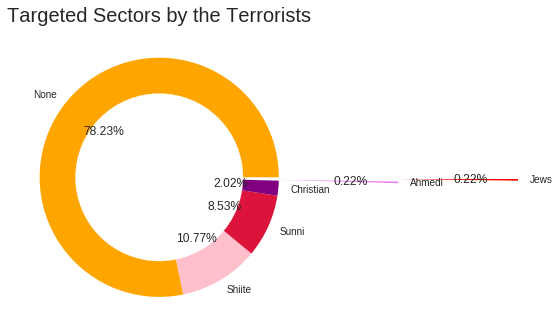

In [0]:
# checking the sector target type

data['Targeted Sect if any'].value_counts()

# replacing shiite with Shiite and Shiite/sunni with Shiite
data['Targeted Sect if any'].replace(('shiite', 'Shiite/sunni'), ('Shiite', 'Shiite'), inplace  = True)

size = [697, 96, 76, 18, 2, 2]
colors = ['orange', 'pink', 'crimson', 'purple', 'violet', 'red']
labels= ['None', 'Shiite', 'Sunni', 'Christian', 'Ahmedi', 'Jews']
explode = [0, 0, 0, 0, 1, 2]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.pie(size, colors = colors, labels = labels,explode = explode, shadow = False, autopct = '%.2f%%')
plt.title('Targeted Sectors by the Terrorists', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

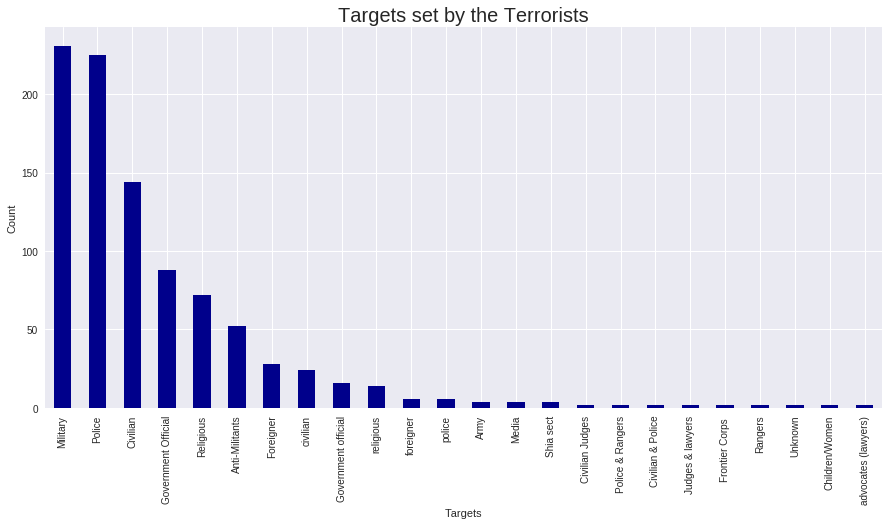

In [0]:
# checking the target type

data['Target Type'].value_counts().plot.bar(figsize = (15, 7), color = 'darkblue')
plt.title('Targets set by the Terrorists', fontsize = 20)
plt.xlabel('Targets')
plt.ylabel('Count')
plt.show()

In [0]:
# checking the influencing event

data['Influencing Event/Event'].value_counts().head(10)

Sectarian strife                                                   14
Military convoy                                                     8
Muharram Procession                                                 8
Shia Religious Gathering                                            4
Sucide bomber wearing an explosive vest carried out the attack.     4
Military Convoy                                                     4
Search operation of Security forces                                 4
military convoy                                                     4
Army convoy                                                         4
Population Census Team                                              2
Name: Influencing Event/Event, dtype: int64

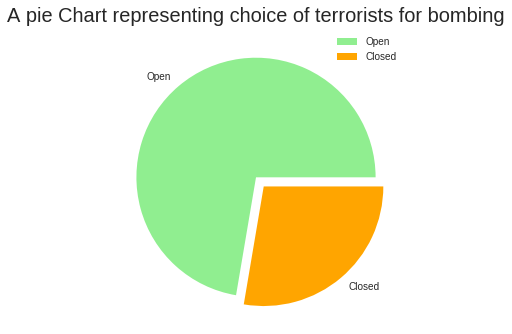

In [0]:
# checking the open/closed space

data['Open/Closed Space'].value_counts()

# replacing open and closed with Open and Closed
data['Open/Closed Space'].replace(('open', 'closed', 'Open/Closed', 'Open '),('Open', 'Closed', 'Open', 'Open'), inplace = True)

data['Open/Closed Space'].value_counts().plot.pie(colors = ['lightgreen', 'orange'], explode = [0, 0.1])
plt.title('A pie Chart representing choice of terrorists for bombing', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


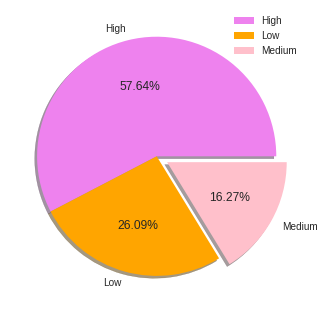

In [0]:
# checking the Location Sensitivity

data['Location Sensitivity'].value_counts()

# replacing low with Low
#data['Location Sensitivity'].replace('low', 'Low', inplace = True)

# plotting a pie chart

size = [528, 239, 149]
colors = ['violet', 'orange', 'pink', 'lightgreen']
labels = ['High', 'Low', 'Medium']
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.legend()
plt.show()

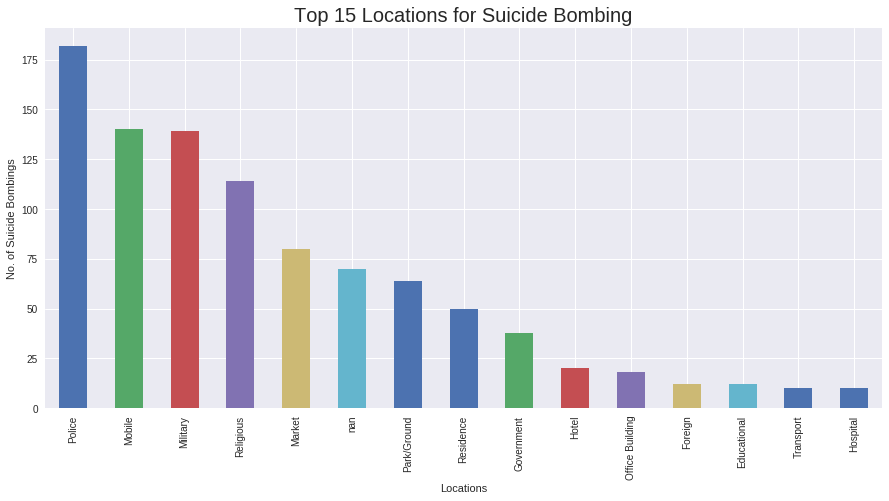

In [0]:
# checking the different locations category

data['Location Category'].value_counts(dropna = False).head(15).plot.bar(figsize = (15, 7))
plt.title('Top 15 Locations for Suicide Bombing', fontsize = 20)
plt.xlabel('Locations')
plt.ylabel('No. of Suicide Bombings')
plt.show()

In [0]:
# checking the Locations

data['Location'].value_counts().head(10)

Imambargah                                                       6
Islamabad Marriott Hotal                                         4
Orangi Town Faqeer Colony                                        4
Mingora police Station                                           4
Security check post Miramshah \nNorth Wazirstan                  4
LI center near Darss Mosque in akakhel area of Tirah valley      2
Model Town and garhi shahu  lahore                               2
Gulistan road-also known as police lines                         2
near the Eidgah in Marriabad Major Muhammad Ali Shaheed Road.    2
Peshawar  Federal minister \npolitical amir muqam house          2
Name: Location, dtype: int64

In [0]:
# checkig the longitudes

data['Longitude'].value_counts().head()

71.5448    142
70.1456     74
66.9911     56
72.4258     54
67.0182     50
Name: Longitude, dtype: int64

In [0]:
# chekcing the latitudes

data['Latitude'].value_counts().head()

34.0043    142
32.9746     74
24.9918     56
35.2227     54
30.2095     50
Name: Latitude, dtype: int64

In [0]:
# checking the time at which the blast occured

data['Time'].value_counts().head(20)

Evening        24
1:30:00 PM     10
6:00 PM         8
12:30:00 PM     8
Noon            6
2:00 PM         6
evening         6
10:00 AM        6
7:15:00 AM      6
Night           6
9:00 AM         6
12:55:00 PM     6
10:30:00 AM     6
2:45:00 PM      6
7:45 AM         6
8:00 AM         5
8:45:00 AM      4
12:45:00 PM     4
9:00:00 AM      4
2:37:00 PM      4
Name: Time, dtype: int64

In [0]:
# checking the types of holidays while on suicide bombings

data['Holiday Type'].value_counts(dropna = False)

NaN                                    844
Weekend                                 90
Ashura                                   8
Labour Day                               6
Eid Milad un-Nabi                        6
Eid-ul-Fitar                             6
Eid Holidays                             4
Ashura Holiday                           4
Pakistan Day                             4
Iqbal Day                                4
Christmas/ birthday of Quaid-e-Azam      2
General Elections                        2
Christmas/birthday of Quaid-e-Azam       2
Eid-ul-azha                              2
Defence Day                              2
Eid ul Azha Holiday                      2
Name: Holiday Type, dtype: int64

In [0]:
# checking the various typs of Islamic dates

data['Islamic Date'].value_counts().head(15)

5 Rajab 1428 A.H                6
19 Jumada al-awwal 1438 A.H     6
6 SHa`baan 1428 A.H             4
19 SHa`baan 1428 A.H            4
15 MuHarram 1428 A.H.           4
14 Thw al-Qi`dah 1428 A.H       4
4 Jumaada al-THaany 1430 A.H    4
20 Raby` al-THaany 1431 A.H.    4
7 MuHarram 1431 A.H             4
7 MuHarram 1430 A.H             4
10 safar 1430 A.H.              4
7 SHawwal 1430 A.H              4
24 RamaDHaan 1431 A.H.          4
21 Thw al-Hijjah 1430 A.H       4
1 Rajab 1428 A.H                4
Name: Islamic Date, dtype: int64

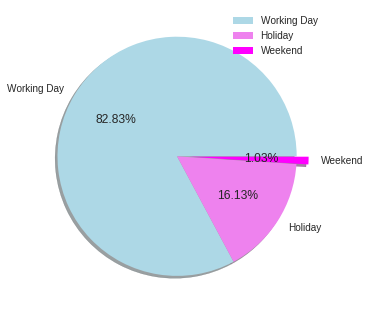

In [0]:
# checking the various blast day types

data['Blast Day Type'].value_counts()

# making a pie chart of probability of bombings on type of holidays

size = [801, 156, 10]
labels = ['Working Day', 'Holiday', 'Weekend']
colors = ['lightblue', 'violet', 'magenta']
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.legend()
plt.show()

In [0]:
# filling missing values

data['Islamic Date'].fillna('None', inplace = True)
data['Blast Day Type'].fillna(data['Blast Day Type'].mode()[0], inplace = True)
data['Holiday Type'].fillna('None', inplace = True)
data['Time'].fillna(data['Time'].mode()[0], inplace = True) # as it a common value
data['Latitude'].fillna(34.0043, inplace = True) # as it is a common value
data['Longitude'].fillna(71.5448, inplace = True) # as it is most common
data['Location'].fillna(data['Location'].mode()[0], inplace = True)
data['Location Category'].fillna(data['Location Category'].mode()[0], inplace = True)
data['Location Sensitivity'].fillna(data['Location Sensitivity'].mode()[0], inplace = True)
data['Open/Closed Space'].fillna(data['Open/Closed Space'].mode()[0], inplace = True)
data['Influencing Event/Event'].fillna('None', inplace = True)
data['Target Type'].fillna('None', inplace = True)
data['Targeted Sect if any'].fillna('None', inplace = True)
data['Killed Min'].fillna(0, inplace = True)
data['Killed Max'].fillna(1.0, inplace = True)
data['Injured Min'].fillna(data['Injured Min'].mode()[0], inplace = True)
data['Injured Max'].fillna(data['Injured Min'].mode()[0], inplace = True)
data['No. of Suicide Blasts'].fillna(1.0, inplace = True)
data['Explosive Weight (max)'].fillna(data['Explosive Weight (max)'].mode()[0], inplace = True)
data['Hospital Names'].fillna(data['Hospital Names'].mode()[0], inplace = True)
data['Temperature(C)'].fillna(data['Temperature(C)'].mode()[0], inplace = True)
data['Temperature(F)'].fillna(data['Temperature(F)'].mode()[0], inplace = True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


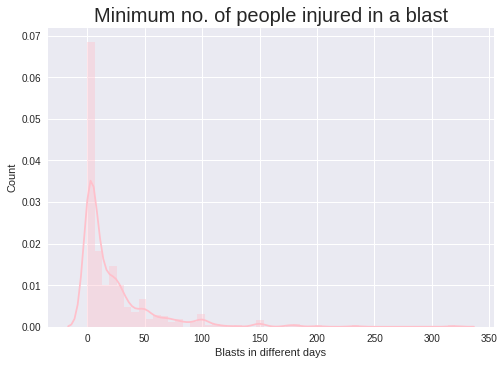

In [0]:
# visualizing minimum no. of people injured in a bomb blast

sns.distplot(data['Injured Min'], color = 'pink')
plt.title('Minimum no. of people injured in a blast', fontsize = 20)
plt.xlabel('Blasts in different days')
plt.ylabel('Count')
plt.show()

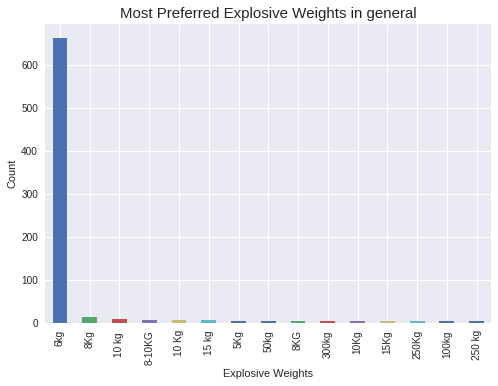

In [0]:
# checking top 15 preferred explosive weights

data['Explosive Weight (max)'].value_counts().head(15).plot.bar()
plt.title('Most Preferred Explosive Weights in general', fontsize = 15)
plt.xlabel('Explosive Weights')
plt.ylabel('Count')
plt.show()

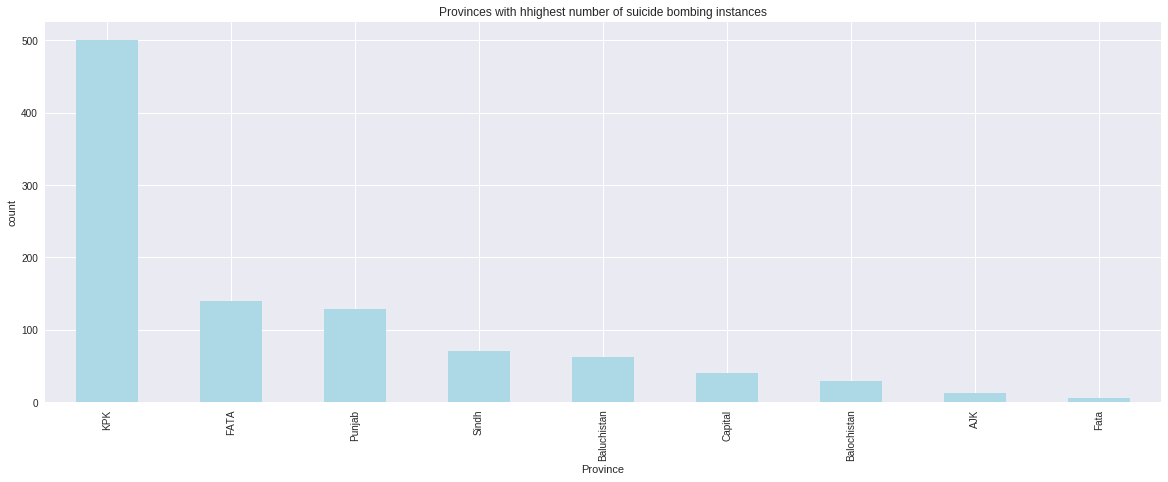

In [0]:
# checking the Provinces where suicide bombing happened

data['Province'].value_counts().plot.bar(figsize = (20, 7), color = 'lightblue')
plt.title('Provinces with hhighest number of suicide bombing instances')
plt.xlabel('Province')
plt.ylabel('count')
plt.show()

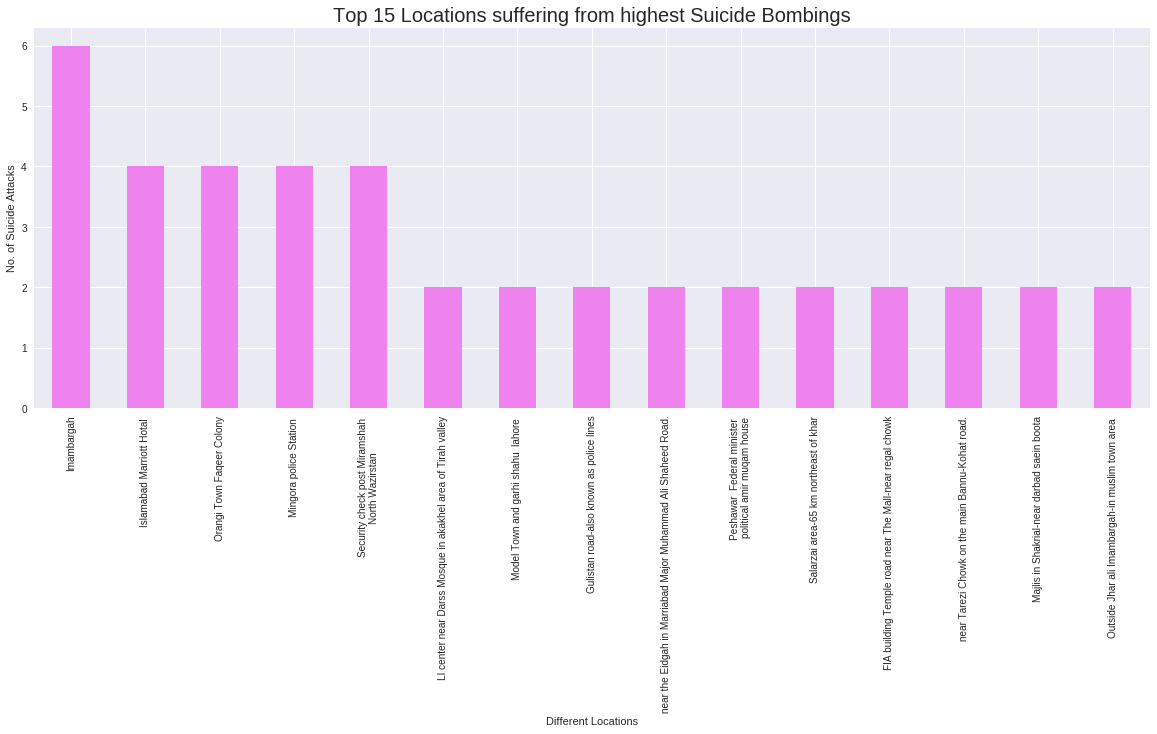

In [0]:
# locations where suicide bombings took place most often

data['Location'].value_counts().head(15).plot.bar(figsize = (20, 7), color = 'violet')
plt.title('Top 15 Locations suffering from highest Suicide Bombings', fontsize = 20)
plt.xlabel('Different Locations')
plt.ylabel('No. of Suicide Attacks')
plt.show()

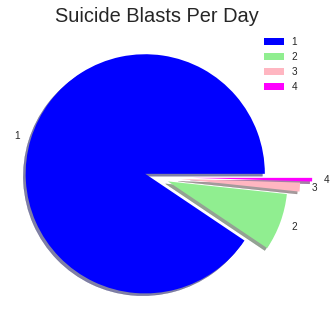

In [0]:
# checking the no. of blasts occuring in a single day

data1['No. of Suicide Blasts'].value_counts(dropna = False)

labels = ['1', '2', '3', '4']
colors = ['blue', 'lightgreen', 'lightpink', 'magenta']
size = [375, 32, 5, 2]
explode = [0.1, 0.1, 0.2, 0.3]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True)
plt.axis('off')
plt.title('Suicide Blasts Per Day', fontsize = 20)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


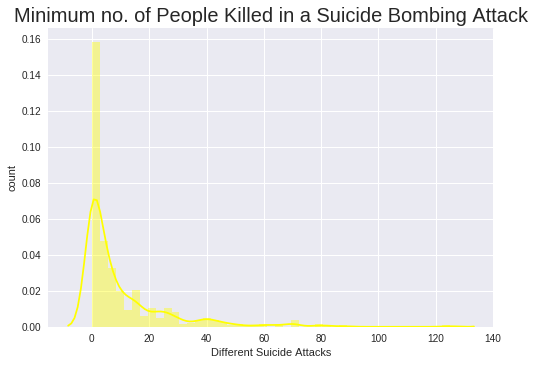

In [0]:
# visualizing minimum killed in a bombing attack

sns.distplot(data['Killed Min'], color = 'yellow')
plt.title('Minimum no. of People Killed in a Suicide Bombing Attack', fontsize = 20)
plt.xlabel('Different Suicide Attacks')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


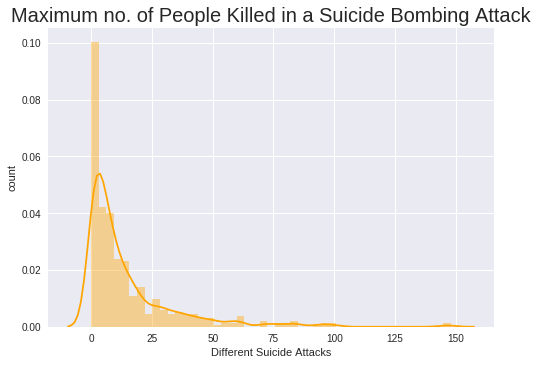

In [0]:
# visualizing maximum killed in a bombing attack

sns.distplot(data['Killed Max'], color = 'orange')
plt.title('Maximum no. of People Killed in a Suicide Bombing Attack', fontsize = 20)
plt.xlabel('Different Suicide Attacks')
plt.ylabel('count')
plt.show()

In [0]:
# Top 10 Hospital Names

data1['Hospital Names'].value_counts().head(10)

Lady Reading Hospital                            20
Lady Reading Hospital \nPeshawar                 10
Lady Reading Hospital                             4
Saidu Sharif hospital                             3
LRH                                               3
Lady Reading Hospital (LRH)                       3
Lady reading hospital                             3
1.CMH Bannu hospital                              3
DHQ Hospital Bannu                                2
1. Lady Reading Hospital Pesh\n2. CMH Peshwar     2
Name: Hospital Names, dtype: int64

In [0]:
# total no. of different cities where suicide bombing has Occured

x = data['City'].value_counts().nunique()
print("Total no. of different cities where suicide bombing has Occured: ", x)

Total no. of different cities where suicide bombing has Occured:  19


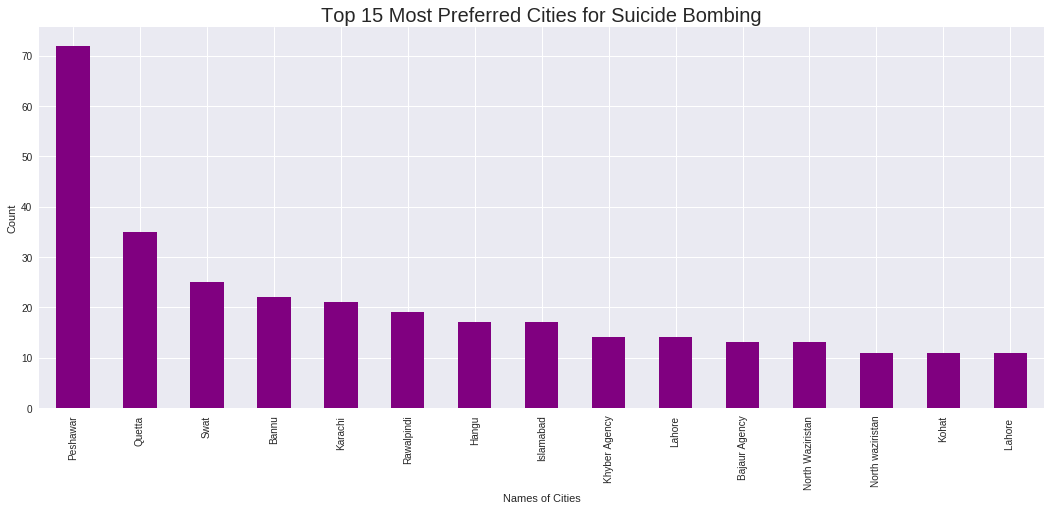

In [0]:
# Top 20 Most Preferred Cities for Suicide Bombing

data1['City'].value_counts().head(15).plot.bar(figsize = (18, 7), color = 'purple')
plt.title('Top 15 Most Preferred Cities for Suicide Bombing', fontsize = 20)
plt.xlabel('Names of Cities')
plt.ylabel('Count')
plt.show()